In [1]:
#import libraries
import pandas as pd

#libarry for feature scaling
from sklearn.preprocessing import StandardScaler

# #confusion matix
from sklearn import metrics
# to creating and reading pickle file
import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# from util import Util_class as obj_util
import importlib.util

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [3]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 120 rows and 5 Columns


In [4]:
#spliting data 
x_test = test_dataset.iloc[:,[2,3]].values
y_test = test_dataset.iloc[:,4].values  

print("x_test :",x_test.shape,"& y_test:",y_test.shape)

x_test : (120, 2) & y_test: (120,)


In [5]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_test,y_test):
    sc_x = StandardScaler()
    x_test = sc_x.fit_transform(x_test)
    return sc_x, x_test
    
sc_x, x_test = feature_scalling(x_test,y_test)

In [7]:
#load model
file1 = open('Random_forest.pkl', 'rb')
classifier = pickle.load(file1)



Average accuracy_score: 85.83333333333333
Average precision-recall score: 69.95
Average Roc-AUC: 85.721


Confusion Matrix:
 [[68 11]
 [ 6 35]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


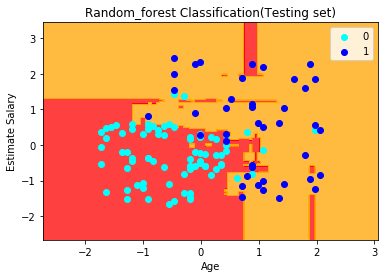

In [8]:
def final_tetsing():
    y_pre = obj_util.y_prediction(x_test, classifier)
#     print("\n\n y_prediction:",y_pre)
    
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_test)
    
    print('\n\nAverage accuracy_score:' , accuracy_score)

    print('Average precision-recall score: {0:0.2f}'.format(average_precision))

    print('Average Roc-AUC: %.3f' % auc)

    cm = obj_util.confusion_matrix(y_test, y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, y_pre))
    obj_util.visualization(x_test,y_test, classifier, "Random_forest Classification(Testing set)", 
                           "Age", "Estimate Salary")
    
# call function
final_tetsing()